# Create a neural network with Keras

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create a sequential neural network with 3 dense layers, and compile  

### Parameters
**Sequential** ([Documantaion](https://keras.io/api/models/sequential/)): A sequential network runs linearly through the layers.  
**Dense** ([Documentaion](https://keras.io/api/layers/core_layers/dense/)): A densely connected network layer. This is the standard for most neural networks.  
**Neurons/Units**: We set these to 32 to start. This is the dimensionality of the output space. Since we just want a final score differences we set the last value to 1.  
**Input Shape**: This is the size of the data you are using to train. In our case, we have home team score, away team score, home team defense and away team defense. So, we set this value to 4.  
**Activation** ([Documentation](https://keras.io/api/layers/activations/#relu-function)): We picked Recified Linear Unit (relu). Using trial and error you can determine which one is best for your data. There are some activations that are for specific network results.  
**Optimizers** ([Documentation](https://keras.io/api/optimizers/rmsprop/)): Optimizers are used during training to try and find the global optimum which will lead to better results. We chose RMSProp as a general purpose optimizer.  
**Metrics** ([Documentation](https://keras.io/api/metrics/)): This array determines what values are tracked and returned during training. We will use these to graph our results and determine how well our model is representing our data.  
**Loss Function** ([Documentation](https://keras.io/api/losses/)): The loss function is what is computed to determine how good or bad our output matches our expected results.

In [ ]:
def Build_Model():
  model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[4]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)                                   
  ])
  
  opt = keras.optimizers.RMSprop()
  m = [
       keras.metrics.MeanAbsoluteError(),
       keras.metrics.Accuracy(),
       keras.metrics.MeanSquaredError()
  ]
  l = keras.losses.MeanSquaredError()
  
  model.compile(loss=l, optimizer=opt, metrics=m)
  return model

In [ ]:
bballmodel = Build_Model()

In [ ]:
# This method will be used in place of the normal output. This is cleaner in my opinion
class PrintDoc(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

### Model Complexity  
I am going to take this section to talk about the complexity of the model as well as high bias and high variance.

**Bias**: A model with low model complexity with a high error rate is said to have high bias. The high bias comes from underfitting the data.  

**Variance**: A model with high complexity with a high error rate is said to have high variance. The high variance comes from overfitting the data.


# Train/Test/Validate the network

In [ ]:
#Load the data set from the last milestone 1
column_names = ['Date','HomeTeam','HomeScore','AwayTeam','AwayScore',
                'HomeScoreAverage','HomeDefenseAverage','AwayScoreAverage','AwayDefenseAverage',
                'Result']

games_csv = 'https://liveproject-resources.s3.amazonaws.com/other/deeplearningbasketballscores/Games-Calculated.csv'
all_data = pd.read_csv(games_csv, header=None, names=column_names)
all_data.head()

,Date,HomeTeam,HomeScore,AwayTeam,AwayScore,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
0,2015-11-13,Hawaii,87,Montana State,76,87.0,76.0,76.0,87.0,11
1,2015-11-13,Eastern Michigan,70,Vermont,50,70.0,50.0,50.0,70.0,20
2,2015-11-13,Yale,70,Fairfield,57,70.0,57.0,57.0,70.0,13
3,2015-11-13,Central Michigan,89,Jacksonville State,83,89.0,83.0,83.0,89.0,6
4,2015-11-13,Iowa State,68,Colorado,62,68.0,62.0,62.0,68.0,6


## Create the Train/Test/Validate data sets  

### All about data  
When training a network we need to send in data for it to learn. We can't then use the same data to test if it is learning. It would be like working a problem in school and then get that same problem on the test. All it proves is you know that data. We need the model to generalize the data versus knowing the actual data.

**Generalization** is a term used to describe the model's ability to understand new data it hasn't seen before. In this project, we need to generalize to all games in the future versus the individual games in the past. When the model doesn't generalize it gets into a scenario where it overfits.  

**Overfitting** is a term used to describe when the model only learns the data it has versus the new data. You can see this visually in the graph of the errors resulting from training. You will see that your training errors will decrease while your validation errors will start to increase again.  

### Splits  
As stated above, we need to ensure we don't overfit to the data. To handle this we need to separate the data into 3 data sets (With the way Keras handles the validation within the network we only create 2). In my example, I used 80% of train (which will get split 80/20 for validation) and 20% for testing. This allows me plenty of randomized data to test my model.  

### Data Labels  
You will notice that I remove the *Results* column and name those as the labels. The labels are used as the answers or truth in the network. When the network gets the data it will then try and predict its own label and compare it versus the correct label. After they get the error (we use mean square error) it uses an algorithm called backpropagation to go back through all the weights and biases in the nodes to attempt to get the answer correct next time.  

### Data Normalization  
At the end of the code I normalize all of the data. The reason for me doing this is to ensure that the scale of the values are all similiar. If our first input ranges from 30 to 120 and the second input ranges from 2 to 10 the first input will have an outsized impact on our learning.


In [ ]:
# Drop the columns that we are NOT going to train on
all_data.drop(['Date','HomeTeam','HomeScore','AwayTeam','AwayScore'], axis=1, inplace=True)
all_data.tail()

#Break it into 80/20 splits
train = all_data.sample(frac=0.8, random_state=0)
test = all_data.drop(train.index)
print('Training Size: %s' % train.shape[0])
print('Testing Size: %s' % test.shape[0])

#Create the labels
train_labels = train.pop('Result')
test_labels = test.pop('Result')

# Normalize the data
mean = train.mean(axis=0)
train_data = train - mean
std = train_data.std(axis=0)
train_data /= std

test_data = test - mean
test_data /= std

Training Size: 16128
Testing Size: 4032


## Train the neural network  

### Parameter
`fit` ([Documentation](https://keras.io/api/models/model_training_apis/#fit-method)): Fit is the method that does the training. We pass in our training values, our expected results, the number of epochs to train, the validation split, the level of logging, and finally we pass in our printing method.

In [ ]:
history = bballmodel.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=0, callbacks=[PrintDoc()])


..........
..........
..........
..........
..........
..........
..........
..........
..........
..........

In [ ]:
# Check the results
# Create a DataFrame from the output from the fit method
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,accuracy,mean_squared_error,val_loss,val_mean_absolute_error,val_accuracy,val_mean_squared_error,epoch
95,84.825653,7.091116,0.0,84.825653,89.628128,7.295441,0.0,89.628128,95
96,84.773827,7.081933,0.0,84.773827,89.807281,7.323231,0.0,89.807281,96
97,84.788231,7.087365,0.0,84.788231,89.080849,7.272832,0.0,89.080849,97
98,84.734123,7.086490,0.0,84.734123,89.620514,7.287719,0.0,89.620514,98
99,84.698662,7.085078,0.0,84.698662,89.373047,7.295228,0.0,89.373047,99


In [ ]:
# Test the network against your testing data set
test_loss, mae, test_acc, mse = bballmodel.evaluate(test_data, test_labels)

126/126 [==============================] - 0s 1ms/step - loss: 89.8128 - mean_absolute_error: 7.2137 - accuracy: 0.0000e+00 - mean_squared_error: 89.8128


## Graph the results

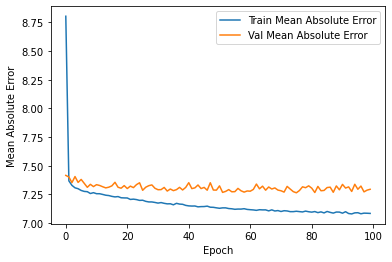

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)

## Graph Meaning  
Your graph might vary but there are certain things that I like to look at when determining if my network is up to the standard expected.  
1. Overfitting: Does the validation error graph start to increase at the end. If it starts going up we have trained too much  
2. Epochs: Do I need to train longer or shorter. In my case, my validation error levels off around 20 epochs. I could look into uses less epochs.
3. Error Rate: After I make sure that my training looks good I check to see if the error rate is acceptable. 7 points of variance is quite a lot when it comes to a basketball game. That is the difference between a win and losing by 6. But, since humans are involved and I don't have unlimited resources I am happy with this value. In a later milestone we do some tuning to try and lower this.